In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exercises

---

## Exercise 1: structured and ustructured images
Write a function that outputs the number of PC you have to choose to retain a given percentage of explained variance.
Use this funtion on the  handwritten digit data, and plot the number of PC needed to retain a certain fraction of EVR, for a few vaules of EVR.

Compare this curve to the one you can obtain in unstructured images: either generate images with the same shape of our data or randomly permute the pixels in each image independenlty. How does the number of PC needed to retain a certain fraction of the variance in this case compare to the number needed for digit images?

In [3]:
import numpy as np
from scipy import io
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("/content/drive/MyDrive/Colab Notebooks/Neuro_Analysis/population-methods/03-dimensionality-reduction/code"))
from utils import download_data

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [4]:
# download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/lRY2FvS7P3TMPwI')

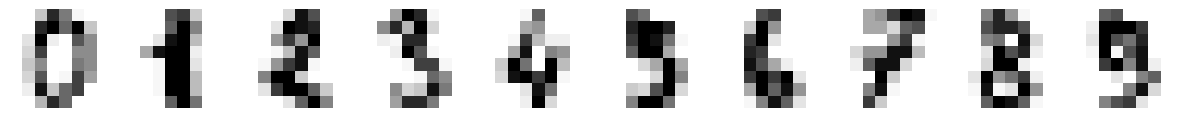

In [5]:
# load image data
dataset = load_digits()
images = dataset.data

#plot first 10 images
plt.figure(figsize=(15,7))
for i,img in enumerate(images[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys)
    plt.axis('off')


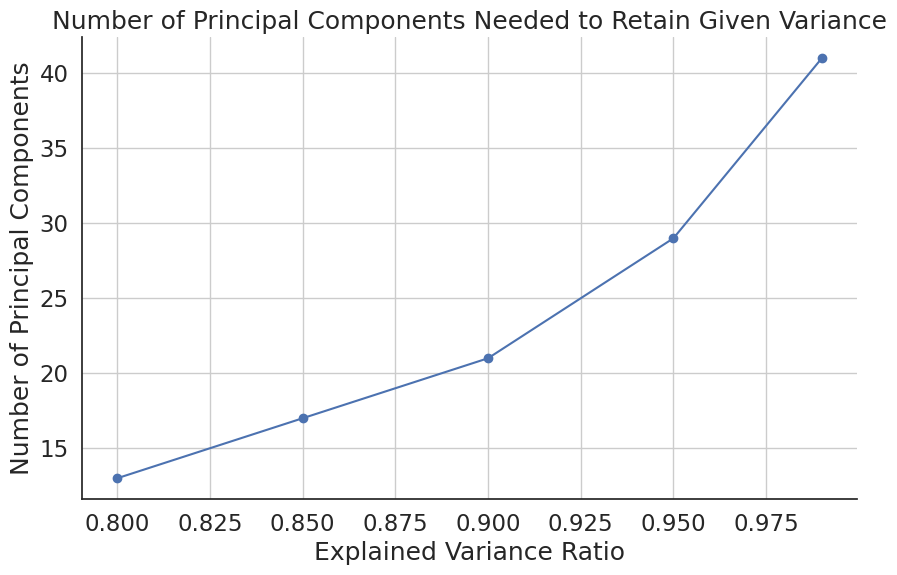

In [8]:
def num_pcs_to_retain_variance(X, variance_threshold):
    pca = PCA()
    pca.fit(X)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_pcs = np.argmax(cumulative_variance >= variance_threshold) + 1
    return num_pcs, cumulative_variance

variance_ratios = [0.8, 0.85, 0.9, 0.95, 0.99]
num_pcs_list = []
cumulative_variance_list = []

# Calculate the number of PCs needed for each variance ratio
for vr in variance_ratios:
    num_pcs, cumulative_variance = num_pcs_to_retain_variance(images, vr)
    num_pcs_list.append(num_pcs)
    cumulative_variance_list.append(cumulative_variance)

# Plot the number of PCs needed to retain each variance ratio
plt.figure(figsize=(10, 6))
plt.plot(variance_ratios, num_pcs_list, marker='o')
plt.xlabel('Explained Variance Ratio')
plt.ylabel('Number of Principal Components')
plt.title('Number of Principal Components Needed to Retain Given Variance')
plt.grid(True)
plt.show()

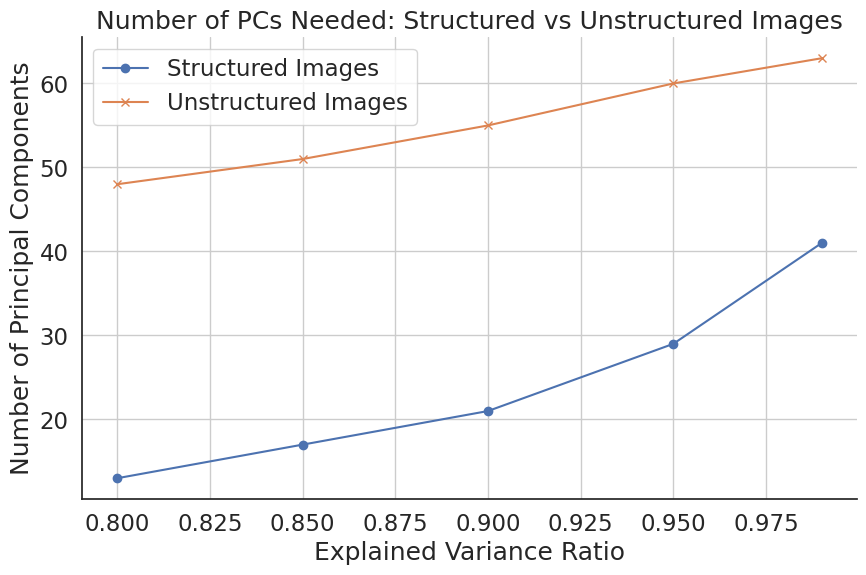

In [10]:
# Generate unstructured images by randomly permuting the pixels in each image
images_unstructured = images.copy()
np.random.seed(42)
for i in range(images_unstructured.shape[0]):
    np.random.shuffle(images_unstructured[i])

# Calculate the number of PCs needed for each variance ratio for unstructured images
num_pcs_unstructured_list = []

for vr in variance_ratios:
    num_pcs, _ = num_pcs_to_retain_variance(images_unstructured, vr)
    num_pcs_unstructured_list.append(num_pcs)

# Plot the comparison of structured vs unstructured images
plt.figure(figsize=(10, 6))
plt.plot(variance_ratios, num_pcs_list, marker='o', label='Structured Images')
plt.plot(variance_ratios, num_pcs_unstructured_list, marker='x', label='Unstructured Images')
plt.xlabel('Explained Variance Ratio')
plt.ylabel('Number of Principal Components')
plt.title('Number of PCs Needed: Structured vs Unstructured Images')
plt.legend()
plt.grid(True)
plt.show()

For the structured images, the data has inherent patterns and structures (e.g., the shapes of the digits), which means that the variance in the data can be captured effectively with fewer principal components. <br>
The unstructured images have pixels permuted randomly, destroying the patterns.Therefore, the variance is spread more evenly across many components, requiring more principal components to retain the same amount of variance.

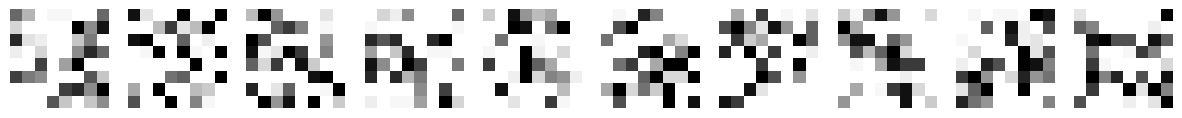

In [11]:
plt.figure(figsize=(15,7))
for i,img in enumerate(images_unstructured[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys)
    plt.axis('off')

## Exercise 2: cortical dynamics

Work with the cortical data we used in the lesson. Write some code that lets you easily chose a specific behavioural event from the `trial_data` dictionary (the recorded events are `CSp` for positive conditioned stimulus, `CSn` for negative conditioned stimulus and `licks` for lick events), one of the principal components, an onset time and and offset time, and plots the timecourse of this component in the selected period around the chosen event type.

Use this code to explore the data: how do different components behave? Do you notice any patterns? How would you test for the statistical significance of the effects that you see (if any)?

## Exercise 3: nonlinear dimensionality reduction

Using the MNIST digit dataset, explore the effect of hyperparameters on the result of nonlinear dimensionality reduction methods.

- Change the `perplexity` and `exageration` parameters in `TNSE` (one at a time). Graphically compare the results of different values.
- Change the neighbourhood size in `Isomap` (set by the parameter `n_neighbors`), and visualize how the results change.

Finally, try to apply one or more of these methods to the cortical data we used in the lessons. How do the data look in two dimensions? Do any cluster seem to appear? Are they robust with respect to hyperparameter choice?